## Problem Statement

 ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. **Creating an automated system to estimate the annual medical expenditure for new customers**, using information such as their age, sex, BMI, children, smoking habits and region of residence.

In [140]:
# import library
import pandas as pd

In [141]:
df = pd.read_csv("medical.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [142]:
# check data type for each column
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Age, bim,children and charges are numeric. Sex, smoker and region are categorical feature

In [143]:
# statistic for numerical column
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The "charges" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.

## Exploratory Analysis and Visualization

In [144]:
# libraries
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The following settings will improve the default style and font sizes for our charts.

In [145]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Age

The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot

In [146]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [147]:
fig = px.histogram(df,x="age",marginal="box",nbins=47, title="Distribution of age")
fig.update_layout(bargap=0.1)
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the [number of people of any given age](https://www.statista.com/statistics/241488/population-of-the-us-by-sex-and-age/) (between 18 & 64) in the USA.

## Body Mass Index (BMI)

In [148]:
fig = px.histogram(df, x="bmi",marginal="box",color_discrete_sequence=["red"],nbins=47,title="Distribution of BMI")
fig.update_layout(bargap=0.1)
fig.show()

The measurements of body mass index seem to form a Gaussian distribution centered around the value 30, with a few outliers towards the right.

### Charges

In [149]:
fig = px.histogram(df, x="charges",marginal="box",color="smoker",color_discrete_sequence=['green','grey'],nbins=47,title="Annual Madical Charges")
fig.update_layout(bargap=0.1)
fig.show()

We can make the following observations from the above graph:

* For most customers, the annual medical charges are under \\$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
* There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is \\$7300, the median for smokers is close to \\$35,000.

In [150]:
fig = px.histogram(df, x='charges', marginal='box', color='sex', color_discrete_sequence=['green','grey'], title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

There is a no significant difference in medical expenses between males and females. The median for both is almost same around \\$9400

In [151]:
fig = px.histogram(df, 
                   x='charges', 
                   marginal='box', 
                   color='region', 
                   color_discrete_sequence=['green','grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

## Smoker

In [152]:
fig = px.histogram(df, x="smoker",color="sex",nbins=47)
fig.update_layout(bargap=0.1)

It appears that 20% of customers have reported that they smoke.

In [153]:
px.histogram(df, x='smoker', color='region', title='Smoker')


In [154]:
px.histogram(df, x='smoker', color='children', title='Smoker')


### Age and Charges

In [155]:
fig = px.scatter(df,x="age",y="charges",color="smoker",opacity=0.8,hover_data=["sex"],title= "Age vs Charges")
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

### BMI and Charges

In [156]:
fig = px.scatter(df,x="bmi",y="charges",color="smoker",opacity=0.8,hover_data=["sex"],title= "Age vs Charges")
fig.update_traces(marker_size=5)

fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

In [157]:
fig = px.scatter(df, 
                 x='smoker', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='children vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

### Correlation

In [158]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [159]:
smoker_value = {"yes": 1,"no": 0}
smoker_numeric = df.smoker.map(smoker_value)
df.charges.corr(smoker_numeric)

0.787251430498477

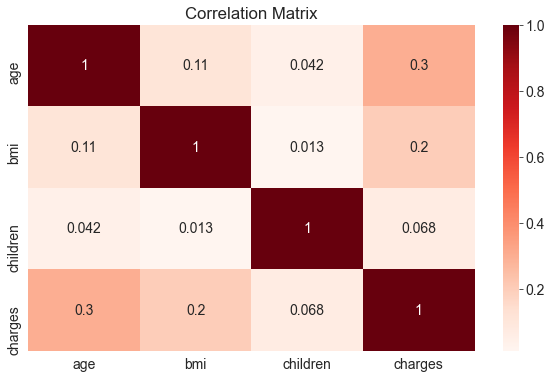

In [160]:
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

## Linear Regression using a Single Feature

We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [174]:
non_smoker_df = df[df.smoker == 'no']

In [175]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<AxesSubplot:title={'center':'Age vs Charges'}, xlabel='age', ylabel='charges'>

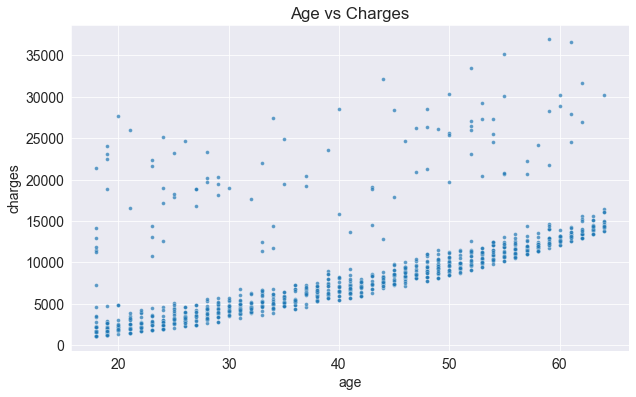

In [176]:
plt.title("Age vs Charges")
sns.scatterplot(data=non_smoker_df, x= 'age', y='charges', alpha=0.7, s=15)

Let define a helper function `estimate_charges`, to compute $charges$, given $age$, $w$ and $b$.

In [225]:
def estimate_charges(age, w, b):
    return w*age + b

Let's _guess_ the values for $w$ and $b$ and use them to estimate the value for charges.

In [178]:
w = 50
b = 100

In [199]:
ages = non_smoker_df.age
type(ages)
estimate_charges = estimate_charges(ages, w, b)

We can plot the estimated charges using a line graph.

Text(0, 0.5, 'Estimate Chatges')

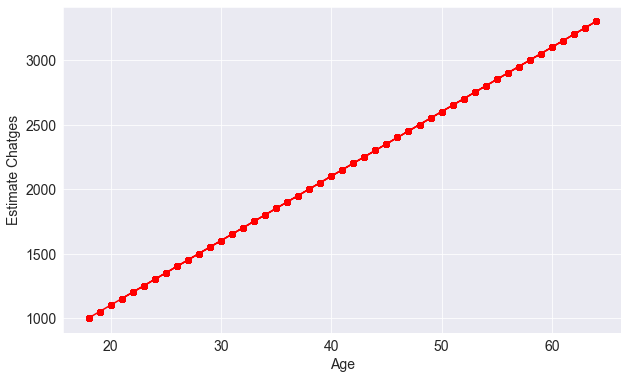

In [180]:
plt.plot(ages,estimate_charges,'r-o')
plt.xlabel("Age")
plt.ylabel("Estimate Chatges")

As expected, the points lie on a straight line. 

We can overlay this line on the actual data, so see how well our _model_ fits the _data_.

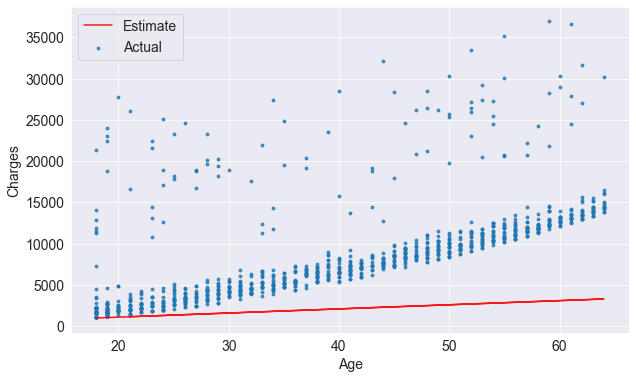

In [181]:
target = non_smoker_df.charges

plt.plot(ages, estimate_charges,'r',alpha=0.9)
plt.scatter(ages, target , s=8, alpha=0.8)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend(['Estimate','Actual'])

Clearly, the our estimates are quite poor and the line does not "fit" the data. However, we can try different values of $w$ and $b$ to move the line around. Let's define a helper function `try_parameters` which takes `w` and `b` as inputs and creates the above plot.

In [189]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    #print(type(ages))
    #print(type(target))
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);
    

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


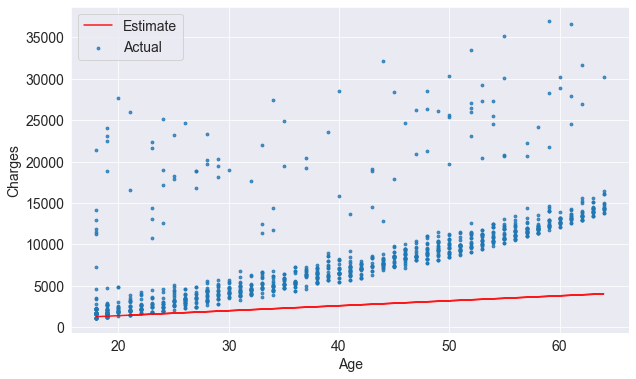

In [201]:
try_parameters(60, 200)


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


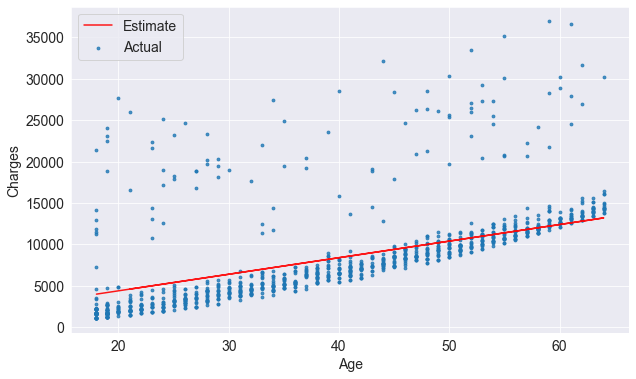

In [203]:
try_parameters(200, 400)

In [205]:
import numpy as np

In [207]:
# Let's define a function to compute the RMSE.
def rmse(target, prediction):
    return np.sqrt(np.mean(np.square(target-prediction)))

In [208]:
w=50
b=200

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


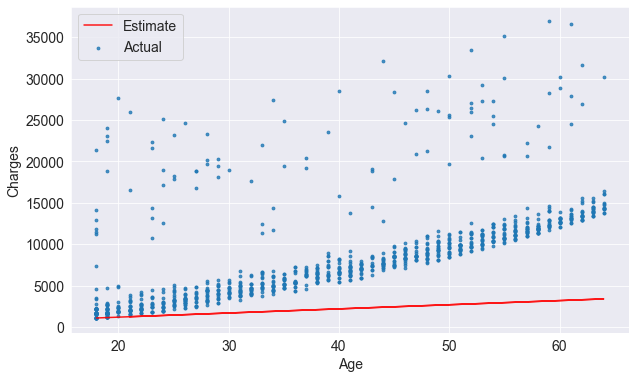

In [210]:
try_parameters(w, b)

In [213]:
target = non_smoker_df['charges']
prediction = estimate_charges(ages,w,b)

In [218]:
rmse(target, prediction)

8386.989336076385

Here's how we can interpret the above number: *On average, each element in the prediction differs from the actual target by \\$8461*. 

The result is called the *loss* because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.

Let's modify the `try_parameters` functions to also display the loss.

In [236]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  6637.534223538461


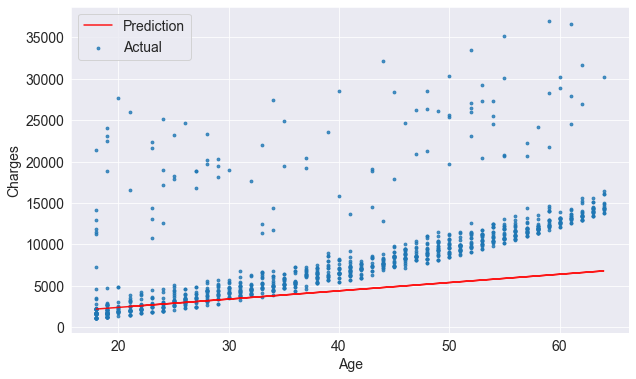

In [237]:
try_parameters(100,400)

### Linear Regression using Scikit-learn

In [238]:
from sklearn.linear_model import LinearRegression

In [248]:
# dateset
inputs = non_smoker_df[['age']]
targets = non_smoker_df['charges']
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [247]:
# First, we create a new model object.
model = LinearRegression()
model.fit(inputs,targets)

LinearRegression()

We can now make predictions using the model. Let's try predicting the charges for the ages 23, 37 and 61

In [249]:
model.predict(np.array([[23], 
                        [37], 
                        [61]]))

array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [251]:
# Let compute the predictions for the entire set of inputs
prediction = model.predict(inputs)

In [252]:
prediction

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [253]:
# # compute RMSE loss
rmse(target, prediction)

4662.505766636395

The parameters of the model are stored in the `coef_` and `intercept_` properties.

In [254]:
model.coef_

array([267.24891283])

In [255]:
model.intercept_

-2091.4205565650864

Are these parameters close to your best guesses?

Let's visualize the line created by the above parameters.

RMSE Loss:  4662.516524487403


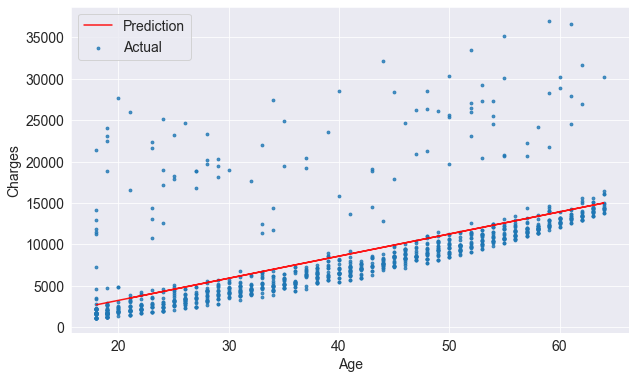

In [256]:
try_parameters(267,-2091)

Indeed the line is quite close to the points. It is slightly above the cluster of points, because it's also trying to account for the outliers.

Use the `SGDRegressor` class from `scikit-learn` to train a model using the stochastic gradient descent technique. Make predictions and compute the loss. Check diffrences.

In [258]:
from sklearn.linear_model import SGDRegressor

In [259]:
sgdmodel = SGDRegressor()

In [260]:
sgdmodel.fit(inputs,targets)

SGDRegressor()

In [261]:
sgdprediction = sgdmodel.predict(inputs)

In [262]:
rmse(target,sgdprediction)

5318.23077877681

RMSE Loss:  5318.23077877681


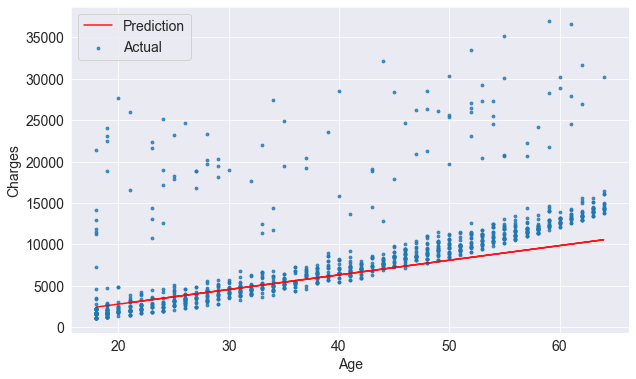

In [263]:
try_parameters(sgdmodel.coef_,sgdmodel.intercept_) # gredient descent is having more prediction error than ordinary least square 

## Summary

In [264]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


## Linear Regression using Multiple Features

In [265]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


As you can see, adding the BMI doesn't seem to reduce the loss by much, as the BMI has a very weak correlation with charges, especially for non smokers.

In [266]:
non_smoker_df.charges.corr(non_smoker_df.bmi)


0.08403654312833271

In [268]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542205

In [267]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038246


Once again, we don't see a big reduction in the loss, even though it's greater than in the case of BMI.

In [271]:
# Create inputs and targets
inputs, targets = df[['age', 'bmi', 'children']], df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


In [272]:
# convert smoker categorical column into numerical column
smoker_codes = {'no': 0, 'yes': 1}
df['smoker_code'] = df.smoker.map(smoker_codes)

In [273]:
# correlation between smkore and charges
df.charges.corr(df.smoker_code)

0.787251430498477

In [275]:
# Create inputs and targets
inputs, targets = df[['age','smoker_code']], df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6389.576957226424


In [276]:
# Create inputs and targets
inputs, targets = df[['age', 'bmi', 'children', 'smoker_code']], df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


In [278]:
sex_codes = {'female': 0, 'male': 1}
df['sex_code'] = df.sex.map(sex_codes)

In [279]:
df.charges.corr(df.sex_code)

0.05729206220202535

In [280]:
# Create inputs and targets
inputs, targets = df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


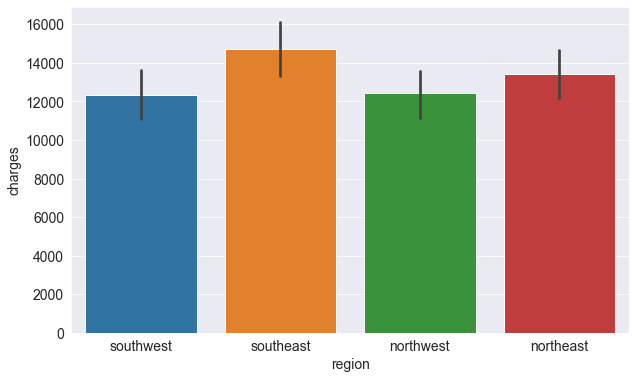

In [287]:
sns.barplot(data=df, x='region', y='charges');


In [288]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [290]:
one_hot = enc.transform(df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [291]:
df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot


In [292]:
df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [293]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = df[input_cols], df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [298]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [299]:
model.intercept_

-12525.547811195454

In [303]:
weight_df = pd.DataFrame({
    'feature':np.append(input_cols,1),
    'weight':np.append(model.coef_,model.intercept_)
})
weight_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [304]:
# scale the dataset

from sklearn.preprocessing import StandardScaler


In [305]:
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(df[numeric_cols])

StandardScaler()

In [306]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [307]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [309]:
scaled_inputs = scaler.transform(df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

These can now we combined with the categorical data

In [310]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = df[cat_cols].values

In [312]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = df[cat_cols].values

In [314]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
5,northeast,587.009235
2,children,475.500545
1,bmi,339.193454
0,age,256.856353
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814
9,1,-12525.547811


Creating a Test set

In [316]:
from sklearn.model_selection import train_test_split


In [317]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)


In [318]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 6162.776014053705


In [319]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6031.8427434256155
